In [1]:
import pandas as pd
import datetime
telco_data = pd.read_excel('data.xlsx')
#telco_data = WS.dropna()

In [2]:
telco_data_subset = telco_data[['start time', 'end time', 'location(latitude/lontitude)']]
telco_data_subset['workload'] = (telco_data_subset['end time']-telco_data_subset['start time']).dt.total_seconds()
telco_data_subset = telco_data_subset[['workload', 'location(latitude/lontitude)']]
telco_data_subset = telco_data_subset.groupby(by = ["location(latitude/lontitude)"]).sum()
telco_data_subset = telco_data_subset.reset_index()
telco_data_subset['location'] = [tuple([float(y) for y in x.split("/")]) for x in telco_data_subset['location(latitude/lontitude)']]
telco_data_subset = telco_data_subset[['workload', 'location']]


c:\users\luke\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [3]:
telco_data_subset.to_pickle("prepared_telco_data.pickle")

In [4]:
telco_data_subset

,workload,location
0,1507810.0,"(22.522803, 114.218796)"
1,643543.0,"(24.284812, 102.999068)"
2,50378.0,"(25.222206, 117.086322)"
3,3755547.0,"(26.139329, 103.078562)"
4,763464.0,"(26.215115, 109.744661)"
5,81696.0,"(28.738742, 120.640606)"
6,5385.0,"(28.812629, 115.952954)"
7,4810.0,"(29.151779, 120.985563)"
8,590670.0,"(29.263844, 115.023159)"
9,849378.0,"(29.526266, 119.910488)"


In [5]:
import matplotlib.pyplot as plt 

In [6]:
Xvalues = []
Yvalues = []

for x in telco_data_subset['location']:
    Xvalues.append(x[0])
    
for x in telco_data_subset['location']:
    Yvalues.append(x[1])

print(len(Xvalues))
print(len(Yvalues))

print(Xvalues[0])
print(Yvalues[0])

2769
2769
22.522803
114.218796


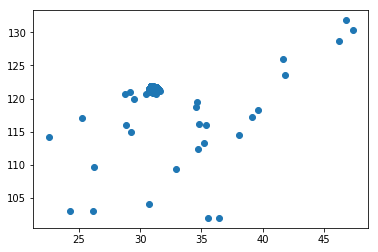

In [7]:
plt.scatter(Xvalues, Yvalues) 

plt.show() 

In [8]:
Workloads = []

for x in telco_data_subset['workload']:
    Workloads.append(x)

In [9]:
print(len(Workloads))

print(Workloads[0])

2769
1507810.0


In [10]:
from sklearn import preprocessing
import numpy as np

In [11]:
normalized_arr = preprocessing.normalize([Workloads])

Resized = []

for x in normalized_arr[0]:
    Resized.append(x*100)

print(normalized_arr[0][0])
print(Resized[0])

0.03652504786776155
3.652504786776155


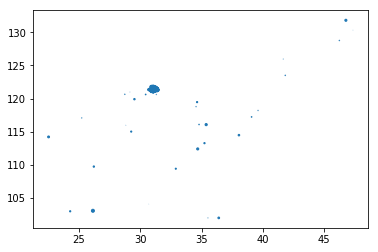

In [12]:
plt.scatter(Xvalues, Yvalues, s=Resized) 
plt.show() 

In [13]:
#import sklearn
from sklearn.cluster import KMeans

In [14]:
NewXArray = []
NewX = []

for x in range(len(Xvalues)):
    NewX.append(Xvalues[x])
    NewX.append(Yvalues[x])
    NewXArray.append(NewX[:])
    NewX.clear()
    

In [15]:
Temp = np.array(NewXArray)

In [16]:
print(Temp)

[[ 22.522803 114.218796]
 [ 24.284812 102.999068]
 [ 25.222206 117.086322]
 ...
 [ 46.247857 128.762232]
 [ 46.777465 131.812182]
 [ 47.35092  130.301233]]


In [17]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)

In [18]:
print(y_km)

[1 1 2 ... 0 0 0]


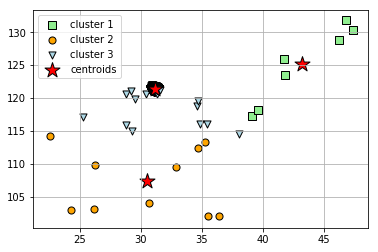

In [19]:
# plot the 3 clusters
plt.scatter(
    Temp[y_km == 0, 0], Temp[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    Temp[y_km == 1, 0], Temp[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    Temp[y_km == 2, 0], Temp[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

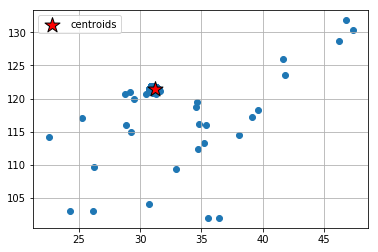

In [20]:
km = KMeans(
    n_clusters=1, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)


plt.scatter(Xvalues, Yvalues) 


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [21]:
print(km.cluster_centers_)

[[ 31.21127429 121.37692724]]


In [22]:
print(km.cluster_centers_[0])

[ 31.21127429 121.37692724]


In [23]:
print(y_km)

[0 0 0 ... 0 0 0]


In [24]:
solutionset = []

for x in y_km:
    solutionset.append(km.cluster_centers_[x])
    

In [25]:
print(solutionset[0])

[ 31.21127429 121.37692724]


In [26]:
print(Temp[y_km == 0, 1])

[114.218796 102.999068 117.086322 ... 128.762232 131.812182 130.301233]


In [27]:
from geopy import distance

In [28]:
def accessDelay(solution, data):
    delay = 0
    i = 0
    for location in solution:
        delay += distance.distance(location,data[i]).km
        i+=1
    return delay
def workloadBalance(solution, data):
    servers = dict.fromkeys(solution,0)
    for index,row in data.iterrows():
        servers[solution[index]] +=  row['workload']
    total = 0
    mean = sum(servers.keys())/len(servers)
    for key,value in servers.items():
        total += (value - mean)**2
    return np.sqrt(total/len(servers))

In [29]:
print(distance.distance(solutionset[0],Temp[0]).km)

1196.2097704331702


In [30]:
print(telco_data_subset.iloc[1]['location'])

(24.284812, 102.999068)


In [31]:
print(accessDelay(solutionset, Temp))

81761.69839366578


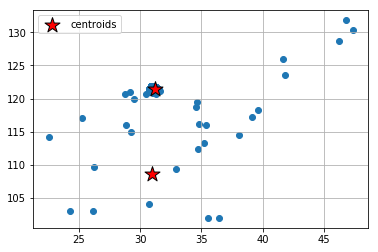

In [32]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)


plt.scatter(Xvalues, Yvalues) 


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [33]:
print(km.cluster_centers_)

[[ 31.21222266 121.43270824]
 [ 30.99338542 108.561244  ]]


In [34]:
print(y_km)

[1 1 0 ... 0 0 0]


In [35]:
solutionset = []

for x in y_km:
    solutionset.append(km.cluster_centers_[x])
    

In [36]:
print(accessDelay(solutionset, Temp))

69810.69701621193


In [37]:
print(workloadBalance(y_km, telco_data_subset))

922371190.1761065


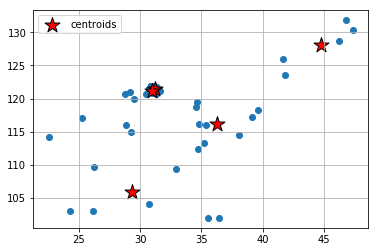

In [38]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)


plt.scatter(Xvalues, Yvalues) 


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [39]:
print(km.cluster_centers_)

[[ 44.7777566  128.0669396 ]
 [ 29.33416787 105.94301937]
 [ 31.2257351  121.4750516 ]
 [ 36.22827    116.22576667]
 [ 30.94530259 121.20383783]]


In [40]:
print(y_km)

[1 1 4 ... 0 0 0]


In [41]:
solutionset = []

for x in y_km:
    solutionset.append(km.cluster_centers_[x])

In [42]:
print(accessDelay(solutionset, Temp))
print(workloadBalance(y_km, telco_data_subset))

49237.64426510517
493714555.33654016


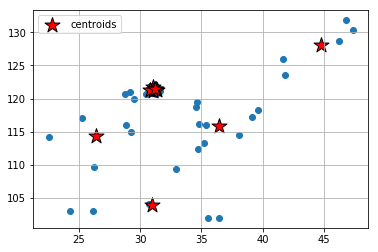

33593.570180006456
211474484.1099888


In [43]:
km = KMeans(
    n_clusters=10, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)


plt.scatter(Xvalues, Yvalues) 


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

solutionset = []

for x in y_km:
    solutionset.append(km.cluster_centers_[x])
    
print(accessDelay(solutionset, Temp))
print(workloadBalance(y_km, telco_data_subset))

In [48]:
ads = []
wbs = []

server_counts = []

for server_count in range(5,26,5):
    server_counts.append(server_count)
    km = KMeans(
        n_clusters=server_count, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(Temp)
    
    solutionset = []

    for x in y_km:
        solutionset.append(km.cluster_centers_[x])
    
    ads.append(accessDelay(solutionset, Temp))
    wbs.append(workloadBalance(y_km, telco_data_subset))




[49237.64426510517, 33593.570180006456, 28455.074330179676, 24186.581811155065, 21392.251791692506]
[493714555.33654016, 211474484.1099888, 129826234.75692092, 84333237.69525512, 69321416.47406203]


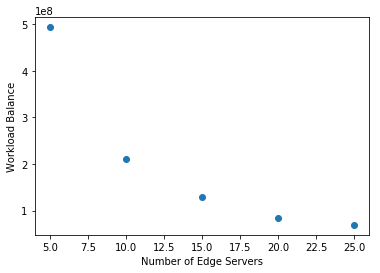

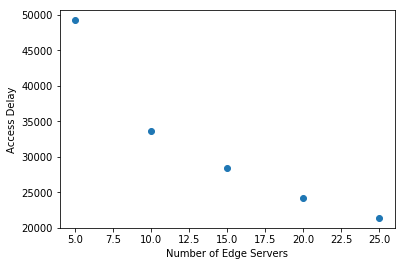

In [49]:
print(ads)
print(wbs)
plt.xlabel("Number of Edge Servers")
plt.ylabel("Workload Balance")
plt.scatter(server_counts,wbs)
plt.show()
plt.xlabel("Number of Edge Servers")
plt.ylabel("Access Delay")
plt.scatter(server_counts,ads)
plt.show()

In [1]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt 

In [8]:
from sklearn.cluster import KMeans

In [11]:
import numpy as np

In [12]:
from geopy import distance

In [2]:
df = pd.read_pickle('200accesspointdata.pickle')

In [3]:
print(df)

     index   workload                 location
0     2303   325418.0  (31.293762, 121.442609)
1      477  1391213.0  (31.045834, 121.408322)
2     1179  1052940.0  (31.201965, 121.452457)
3     1852       14.0    (31.24672, 121.38645)
4     1469  1336278.0  (31.225266, 121.444323)
..     ...        ...                      ...
195   1679   118810.0  (31.237435, 121.455917)
196   1447    11267.0  (31.223721, 121.482534)
197    170   165873.0  (30.894923, 121.319564)
198   1308    10799.0     (31.21351, 121.3728)
199   2752   535390.0   (32.902077, 109.42358)

[200 rows x 3 columns]


In [4]:
Xvalues = []
Yvalues = []

for x in df['location']:
    Xvalues.append(x[0])
    
for x in df['location']:
    Yvalues.append(x[1])

print(len(Xvalues))
print(len(Yvalues))

print(Xvalues[0])
print(Yvalues[0])

200
200
31.293762
121.442609


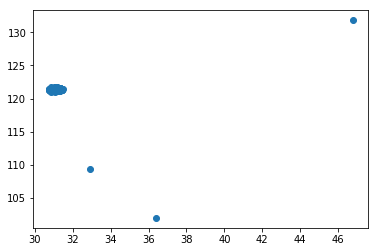

In [7]:
plt.scatter(Xvalues, Yvalues) 

plt.show() 

In [9]:
NewXArray = []
NewX = []

for x in range(len(Xvalues)):
    NewX.append(Xvalues[x])
    NewX.append(Yvalues[x])
    NewXArray.append(NewX[:])
    NewX.clear()
    

In [14]:
Temp = np.array(NewXArray)

In [15]:
km = KMeans(
    n_clusters=20, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Temp)

In [17]:
def accessDelay(solution, data):
    delay = 0
    i = 0
    for location in solution:
        delay += distance.distance(location,data[i]).km
        i+=1
    return delay
def workloadBalance(solution, data):
    servers = dict.fromkeys(solution,0)
    for index,row in data.iterrows():
        servers[solution[index]] +=  row['workload']
    total = 0
    mean = sum(servers.values())/len(servers)
    for key,value in servers.items():
        total += (value - mean)**2
    return np.sqrt(total/len(servers))

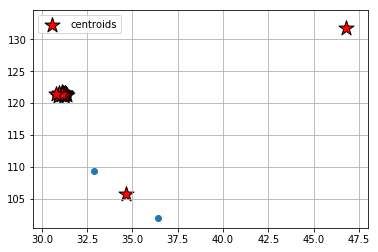

In [18]:
plt.scatter(Xvalues, Yvalues) 


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [19]:
solutionset = []

for x in y_km:
    solutionset.append(km.cluster_centers_[x])

In [25]:
print("Access Delay " + str(accessDelay(solutionset, Temp)))
print("Workload Balance " + str(workloadBalance(y_km, df)))

Access Delay 1643.1522023752152
Workload Balance 3047333.3816899816
